1. Загрузите библиотеки pandas, numpy, matplotlib, seaborn.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

2. Загрузите содержимое датасета - Mall_Customers.csv. Исходный набор данных содержит сведения о посетителях торгового центра. В наборе присутствуют следующие признаки:
- CustomerID - идентификатор клиента;
- Genre – пол;
- Age – возраст;
- Annual Income – доход;
- Spending Score - баллы, присваиваемые клиенту специалистами по анализу данных торгового центра (от 1 до 100). Чем больше клиент тратит – тем больше баллов ему присваивается.


In [ ]:
data = pd.read_csv('Mall_Customers.csv')

3. Выведите на экран пять первых строк этого файла.

In [ ]:
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


4. Переименуйте столбец Genre в Gender. Выведите содержимое датасета после переименования.

In [ ]:
data.rename(columns={'Genre': 'Gender'}, inplace=True)
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


5. Если данные были получены из внешних источников, то могут возникать проблемы с пропущенными или недоступными данными. Поэтому посчитайте и выведите на экран компьютера количество пропущенных или недоступных данных в каждом поле загруженного файла.

In [ ]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


6. Рассчитайте по каждому полю анализируемого файла количество записей, их минимальное и максимальное значение, их стандартное отклонение, 25-й, 50-й и 75-й перцентиль.

In [ ]:
# Рассчет анализа данных по каждому полю
fields = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for field in fields:
    print(f"Анализ поля: {field}")
    print(f"Количество записей: {data[field].count()}")
    print(f"Минимальное значение: {data[field].min()}")
    print(f"Максимальное значение: {data[field].max()}")
    print(f"Стандартное отклонение: {data[field].std()}")
    print("Перцентили:")
    print(data[field].quantile([0.25, 0.5, 0.75]))
    print("\n")

Анализ поля: CustomerID
Количество записей: 200
Минимальное значение: 1
Максимальное значение: 200
Стандартное отклонение: 57.879184513951124
Перцентили:
0.25     50.75
0.50    100.50
0.75    150.25
Name: CustomerID, dtype: float64


Анализ поля: Age
Количество записей: 200
Минимальное значение: 18
Максимальное значение: 70
Стандартное отклонение: 13.96900733155888
Перцентили:
0.25    28.75
0.50    36.00
0.75    49.00
Name: Age, dtype: float64


Анализ поля: Annual Income (k$)
Количество записей: 200
Минимальное значение: 15
Максимальное значение: 137
Стандартное отклонение: 26.264721165271244
Перцентили:
0.25    41.5
0.50    61.5
0.75    78.0
Name: Annual Income (k$), dtype: float64


Анализ поля: Spending Score (1-100)
Количество записей: 200
Минимальное значение: 1
Максимальное значение: 99
Стандартное отклонение: 25.823521668370173
Перцентили:
0.25    34.75
0.50    50.00
0.75    73.00
Name: Spending Score (1-100), dtype: float64




7.  Постройте столбиковые диаграммы отдельно для  Age – возраста; Annual Income – дохода и  Spending Score – баллов клиента.

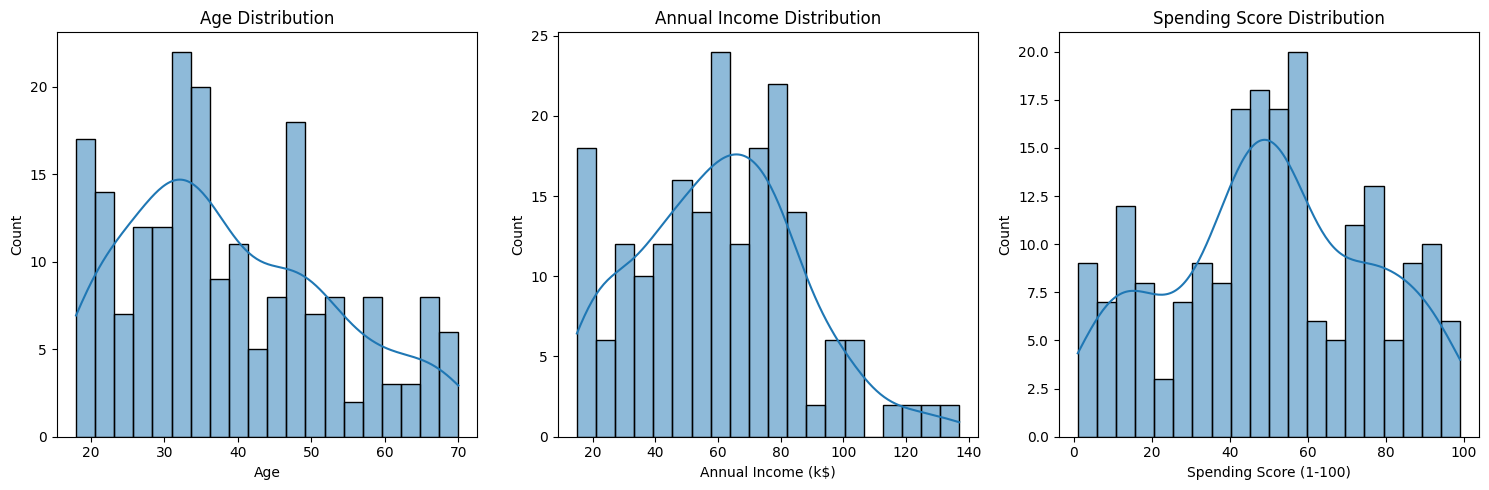

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

Большинство клиентов сконцентрированы в возрастной группе от 20 до 40 лет.
Есть небольшая доля клиентов старше 60 лет.
Распределение возраста не является равномерным.

Большинство клиентов имеют годовой доход в диапазоне от низкого до среднего.
Есть небольшая доля клиентов с высоким годовым доходом.
Распределение годового дохода позволяет выделить группы клиентов по уровню дохода.

Оценка расходов клиентов имеет более равномерное распределение по сравнению с возрастом и годовым доходом.
Есть клиенты с низкими, средними и высокими оценками расходов.
Распределение оценки расходов может помочь в понимании предпочтений и потребностей клиентов.

Изучение распределения всех трех параметров вместе может помочь в выявлении корреляций между ними и выделении групп клиентов с определенными характеристиками.

8. Постройте тепловую карту корреляции для CustomerID, Age, Annual Income и Spending Score.

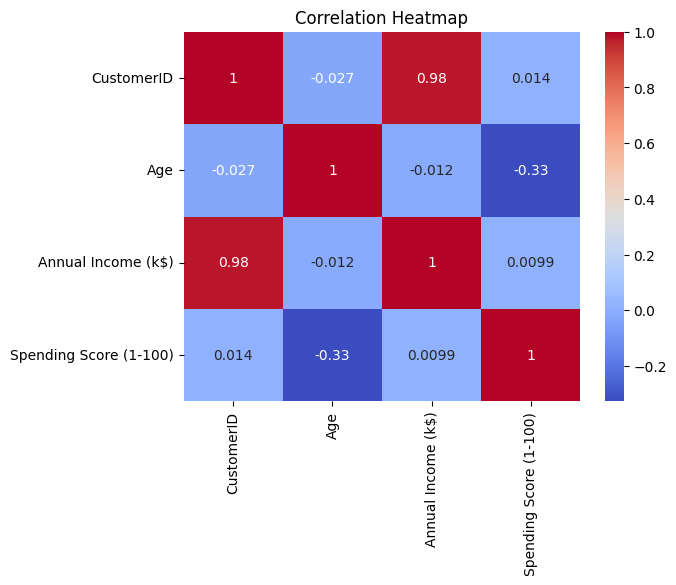

In [ ]:
# Построение тепловой карты корреляции
corr = data[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Корреляция между возрастом и оценкой расходов**:
На тепловой карте видно, что корреляция между возрастом и оценкой расходов клиентов близка к нулю.
Это означает, что возраст клиента не имеет значительного влияния на его оценку расходов.

 **Корреляция между годовым доходом и оценкой расходов**:
На тепловой карте видно, что существует слабая положительная корреляция между годовым доходом клиентов и их оценкой расходов.
Это может указывать на то, что клиенты с более высоким годовым доходом склонны к более высоким оценкам расходов.

Годовой доход клиентов имеет влияние на их оценку расходов, в то время как возраст не имеет сильного влияния на этот показатель.

9. Создайте переменную X, которая будет содержать данные из столбцов 3 и 4 датасета в виде массива NumPy, который можно будет использовать для обучения модели. Вывести этот массив на экран.

In [ ]:
import numpy as np

X = data.iloc[:, [2, 3]].values
print(X)

[[ 19  15]
 [ 21  15]
 [ 20  16]
 [ 23  16]
 [ 31  17]
 [ 22  17]
 [ 35  18]
 [ 23  18]
 [ 64  19]
 [ 30  19]
 [ 67  19]
 [ 35  19]
 [ 58  20]
 [ 24  20]
 [ 37  20]
 [ 22  20]
 [ 35  21]
 [ 20  21]
 [ 52  23]
 [ 35  23]
 [ 35  24]
 [ 25  24]
 [ 46  25]
 [ 31  25]
 [ 54  28]
 [ 29  28]
 [ 45  28]
 [ 35  28]
 [ 40  29]
 [ 23  29]
 [ 60  30]
 [ 21  30]
 [ 53  33]
 [ 18  33]
 [ 49  33]
 [ 21  33]
 [ 42  34]
 [ 30  34]
 [ 36  37]
 [ 20  37]
 [ 65  38]
 [ 24  38]
 [ 48  39]
 [ 31  39]
 [ 49  39]
 [ 24  39]
 [ 50  40]
 [ 27  40]
 [ 29  40]
 [ 31  40]
 [ 49  42]
 [ 33  42]
 [ 31  43]
 [ 59  43]
 [ 50  43]
 [ 47  43]
 [ 51  44]
 [ 69  44]
 [ 27  46]
 [ 53  46]
 [ 70  46]
 [ 19  46]
 [ 67  47]
 [ 54  47]
 [ 63  48]
 [ 18  48]
 [ 43  48]
 [ 68  48]
 [ 19  48]
 [ 32  48]
 [ 70  49]
 [ 47  49]
 [ 60  50]
 [ 60  50]
 [ 59  54]
 [ 26  54]
 [ 45  54]
 [ 40  54]
 [ 23  54]
 [ 49  54]
 [ 57  54]
 [ 38  54]
 [ 67  54]
 [ 46  54]
 [ 21  54]
 [ 48  54]
 [ 55  57]
 [ 22  57]
 [ 34  58]
 [ 50  58]
 [ 68  59]

10. Определить оптимальное количество кластеров.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

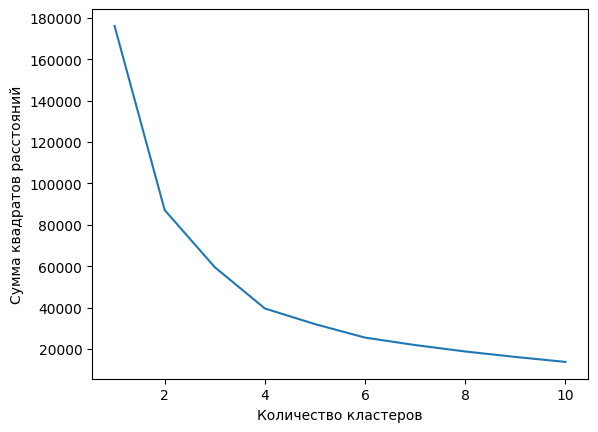

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

11. Определить оптимальное число кластеров для набора данных методом силуэта. Построить график. Сравнить результат с методом «локтя».

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

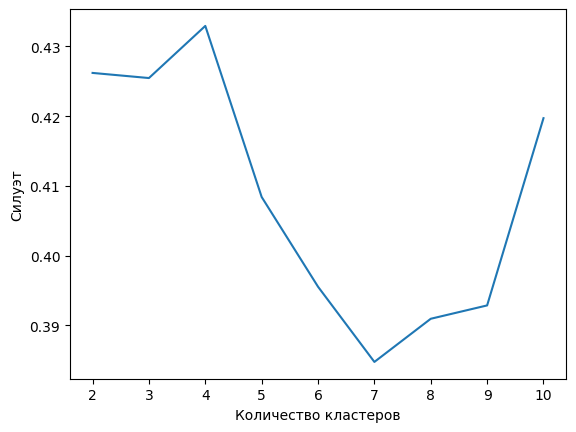

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.show()


Значение силуэта близкое к 1 указывает на хорошее разделение кластеров.
Чем ближе значение силуэта к 1, тем лучше разделение кластеров.
Количество кластеров - 4
Результаты кластеризации могут быть использованы для сегментации клиентов.

В целом, анализ значения силуэта помогает определить оптимальное количество кластеров для кластеризации данных и оценить качество разделения кластеров.


12. Обучить модель для оптимального количества кластеров. Добавить метки кластеров (поле «Номер кластера») в датасет и заполнить его номерами кластеров для каждой строки датасета. Вывести на экран новое содержание датасета с полем “Номер кластера”.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(X)

data['Номер кластера'] = cluster_labels

print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Номер кластера  
0                 2  
1                 2  
2                 2  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13. Построить точечный график кластеров потребителей, по оси Х которого отложить значения дохода клиента, а по оси Y – баллы клиента. Точки, относящиеся к одному и тому же кластеру, должны быть окрашены в один и тот же цвет.

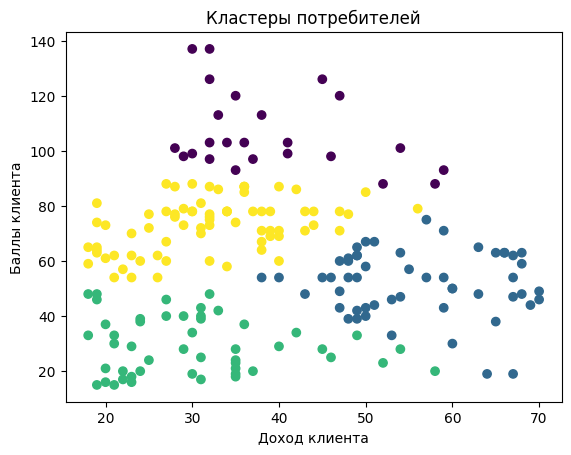

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Доход клиента')
plt.ylabel('Баллы клиента')
plt.title('Кластеры потребителей')
plt.show()

На графике видно, что потребители разделены на различные кластеры в соответствии с их доходом и баллами.
Каждый цвет на графике представляет отдельный кластер, что позволяет визуально оценить структуру данных.

Кластеры имеют различные распределения по доходу и баллам, что указывает на наличие различных групп потребителей с уникальными характеристиками.
Некоторые кластеры более плотно сгруппированы, в то время как другие более разреженными.

Построение графика кластеризации помогает визуализировать результаты алгоритма кластеризации и лучше понять структуру данных.
Полученные кластеры могут быть использованы для дальнейшего анализа и принятия решений, например, для создания персонализированных стратегий продаж или маркетинга.

Визуализация кластеризации потребителей помогает обнаружить паттерны и группировки в данных, что может быть полезно для оптимизации бизнес-процессов и улучшения взаимодействия с клиентами.


14. Построить дендрограмму кластеризации клиентов.

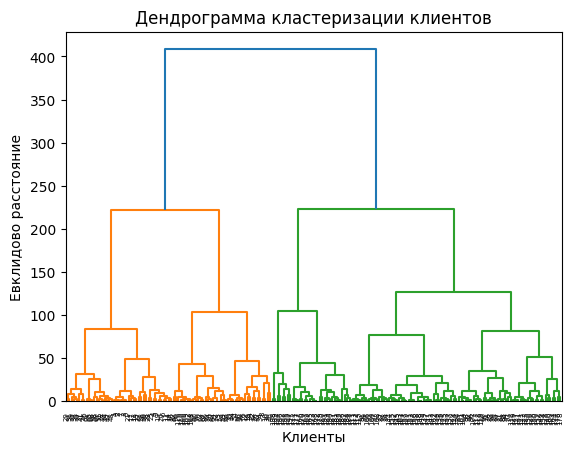

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Дендрограмма кластеризации клиентов')
plt.xlabel('Клиенты')
plt.ylabel('Евклидово расстояние')
plt.show()
import scipy.cluster.hierarchy as sch

Дендрограмма позволяет визуально оценить структуру данных и их иерархическую организацию.
В данном случае, клиенты были кластеризованы на основе евклидового расстояния между ними.

На дендрограмме можно увидеть различные уровни иерархии, где более высокие уровни объединяют более общие кластеры, а более низкие уровни представляют более специфические кластеры.
Расстояние между точками на дендрограмме отражает степень сходства или различия между кластерами.

Дендрограмма кластеризации помогает визуализировать процесс группировки клиентов и понять, как они связаны между собой.
В целом, дендрограмма кластеризации является полезным инструментом для визуализации и интерпретации результатов алгоритма кластеризации и может помочь в понимании структуры данных и выявлении группировок клиентов.
